<span style="font-size:20px;">
Objective:

The primary objective of this analysis is to evaluate the effectiveness of advertising spending on conversion rates in a social media ad campaign dataset. Specifically, we aim to:

1. Determine the Impact of Ad Spending:
   - Assess whether higher spending on ads leads to better conversion rates compared to lower spending. This will be done by comparing the conversion rates for ads in the top spending quartile against those in the bottom spending quartile.

2. Hypothesis Testing:
   - Formulate and test the hypothesis that "Ads with higher spending have better conversion rates compared to ads with lower spending." This will involve:
     - Calculating conversion rates for both high and low spending ads.
     - Performing statistical tests to determine if there is a significant difference between these rates.

3. Data Exploration and Preparation:
   - Conduct an initial exploration of the dataset to understand its structure, including checking for missing values, summarizing statistics, and exploring the distribution of key variables.
   - Prepare the data by handling any anomalies, missing values, or outliers that might affect the analysis.

4. Visualize Key Insights:
   - Create visualizations to illustrate the distribution of ad spending, conversion rates, and any observed patterns or trends. This includes plotting histograms, box plots, and other relevant charts to provide a clear view of the data.

By achieving these objectives, we aim to provide actionable insights into the effectiveness of advertising strategies and help inform future decision-making for optimizing ad spend. </span>


In [83]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\karlm\OneDrive\Desktop\A-B Testing\KAG_conversion_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataframe to get familiar with the dataset:")
print(df.head())


First few rows of the dataframe to get familiar with the dataset:
    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746              916          103916  30-34      M        15   
1  708749              916          103917  30-34      M        16   
2  708771              916          103920  30-34      M        20   
3  708815              916          103928  30-34      M        28   
4  708818              916          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1  


In [84]:
# Display the shape of the dataframe
print("\nShape of the dataframe:")
print(df.shape)




Shape of the dataframe:
(1143, 11)


In [85]:
# Display column names and data types
print("\nColumn names and data types:")
print(df.dtypes)




Column names and data types:
ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object


In [86]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())




Summary statistics for numerical columns:
              ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   


In [87]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64


In [88]:
# Unique values and counts for categorical columns
categorical_columns = ['age', 'gender', 'interest']
print("\nUnique values and counts for categorical columns:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())


Unique values and counts for categorical columns:

age:
age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

gender:
gender
M    592
F    551
Name: count, dtype: int64

interest:
interest
16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
31      25
30      25
2       25
7       24
24      24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
105      7
101      7
112      7
108      7
100      6
111      6
113      6
109      6
103      5
114      5
104      5
106      5
Name: count, dtype: int64


<span style="font-size:16px;">
To effectively analyze the impact of ad spending on conversion rates, we need to categorize the ad spending data into distinct groups. We will divide the data into "Low Spending" and "High Spending" based on the 25th and 75th percentiles of ad expenditure. This segmentation will help us understand how varying levels of spending influence conversion rates. Once categorized, we can compare the conversion rates across these different spending levels to assess their effectiveness.</span>

In [63]:
# Compute quartiles for spending
spending_quartiles = df['Spent'].quantile([0.25, 0.75])
lower_quartile = spending_quartiles[0.25]
upper_quartile = spending_quartiles[0.75]

<span style="font-size:16px;">
To categorize ads based on spending, we will classify them into 'Low Spending', 'Medium Spending', and 'High Spending' groups. This involves segmenting the ad expenditure into predefined ranges and assigning appropriate labels. This categorization allows for a structured analysis of ad performance across different spending levels.</span>

In [65]:
# Create a new column to classify ads into 'High Spending' and 'Low Spending'
df['Spending_Category'] = pd.cut(df['Spent'], bins=[-float('inf'), lower_quartile, upper_quartile, float('inf')],
                                 labels=['Low Spending', 'Medium Spending', 'High Spending'])

<span style="font-size:16px;">
To assess the effectiveness of each ad, we calculate the conversion rate, which is the ratio of 'Approved_Conversion' to 'Impressions'. This metric reveals how well each ad turns views into actual conversions, providing valuable insights into ad performance and efficiency.</span>

In [67]:
# Calculate conversion rates
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Impressions']

<span style="font-size:16px;">
To evaluate ad performance across different spending levels, we compute the average conversion rates for each spending category. By grouping the data by 'Spending_Category' and calculating the mean conversion rate within each group, we gain insights into how spending levels influence conversion effectiveness.</span>


In [69]:
# Calculate mean conversion rates for high and low spending ads
conversion_rates = df.groupby('Spending_Category')['Conversion_Rate'].mean()
print("Mean Conversion Rates by Spending Category:")
print(conversion_rates)

Mean Conversion Rates by Spending Category:
Spending_Category
Low Spending       0.000354
Medium Spending    0.000025
High Spending      0.000004
Name: Conversion_Rate, dtype: float64


C:\Users\karlm\AppData\Local\Temp\ipykernel_9340\3982256599.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_rates = df.groupby('Spending_Category')['Conversion_Rate'].mean()


<span style="font-size:16px;">
To determine if there's a meaningful difference in conversion rates between low and high spending ads, we perform a statistical test. We use a two-sample t-test to compare the average conversion rates of these two groups. The test assesses whether the observed difference in conversion rates is significant or if it could have occurred by chance. We also ensure any missing data is excluded before the test to maintain accuracy.</span>

In [71]:
# Perform a statistical test (e.g., t-test) to compare conversion rates
from scipy.stats import ttest_ind

In [72]:
# Filter data for low and high spending ads
low_spending_ads = df[df['Spending_Category'] == 'Low Spending']['Conversion_Rate']
high_spending_ads = df[df['Spending_Category'] == 'High Spending']['Conversion_Rate']

In [73]:
# Perform a t-test
t_stat, p_value = ttest_ind(low_spending_ads.dropna(), high_spending_ads.dropna())
print("\nT-test results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-test results:
T-statistic: 5.4400834397503175
P-value: 7.910174448245247e-08


<span style="font-size:32px;">
Purpose: Determines whether the observed difference in conversion rates is statistically significant.
Details: alpha is the significance level (commonly set at 0.05).
If p_value is less than alpha, the difference is considered statistically significant, meaning that high spending ads have a different conversion rate compared to low spending ads. </span>

In [75]:
# Interpret results
alpha = 0.05
if p_value < alpha:
    print("\nThere is a significant difference in conversion rates between high and low spending ads.")
else:
    print("\nThere is no significant difference in conversion rates between high and low spending ads.")


There is a significant difference in conversion rates between high and low spending ads.


C:\Users\karlm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


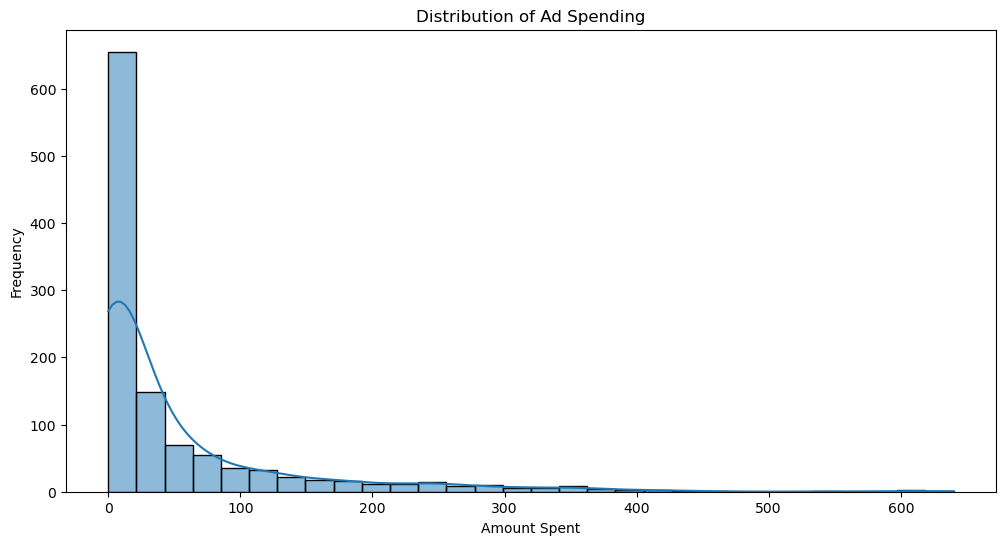

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ad spending
plt.figure(figsize=(12, 6))
sns.histplot(df['Spent'], bins=30, kde=True)
plt.title('Distribution of Ad Spending')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()


C:\Users\karlm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


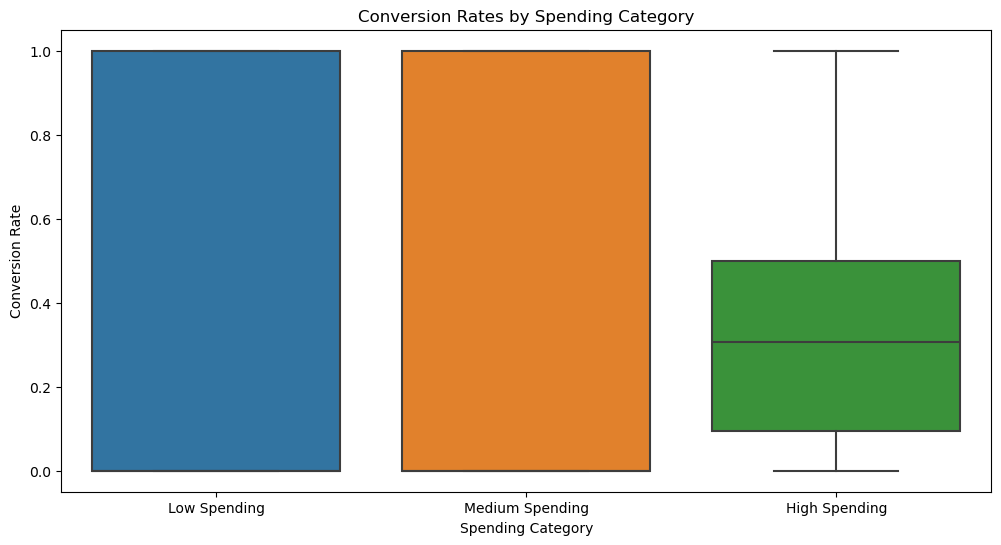

In [81]:
# Calculate conversion rates
df['Conversion_Rate'] = df['Approved_Conversion'] / df['Total_Conversion']

# Define spending quartiles
spending_q1 = df['Spent'].quantile(0.25)
spending_q3 = df['Spent'].quantile(0.75)

# Create categories for spending
df['Spending_Category'] = pd.cut(df['Spent'], bins=[-float('inf'), spending_q1, spending_q3, float('inf')],
                                 labels=['Low Spending', 'Medium Spending', 'High Spending'])

# Plot conversion rates by spending category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Spending_Category', y='Conversion_Rate', data=df)
plt.title('Conversion Rates by Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Conversion Rate')
plt.show()


C:\Users\karlm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karlm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karlm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


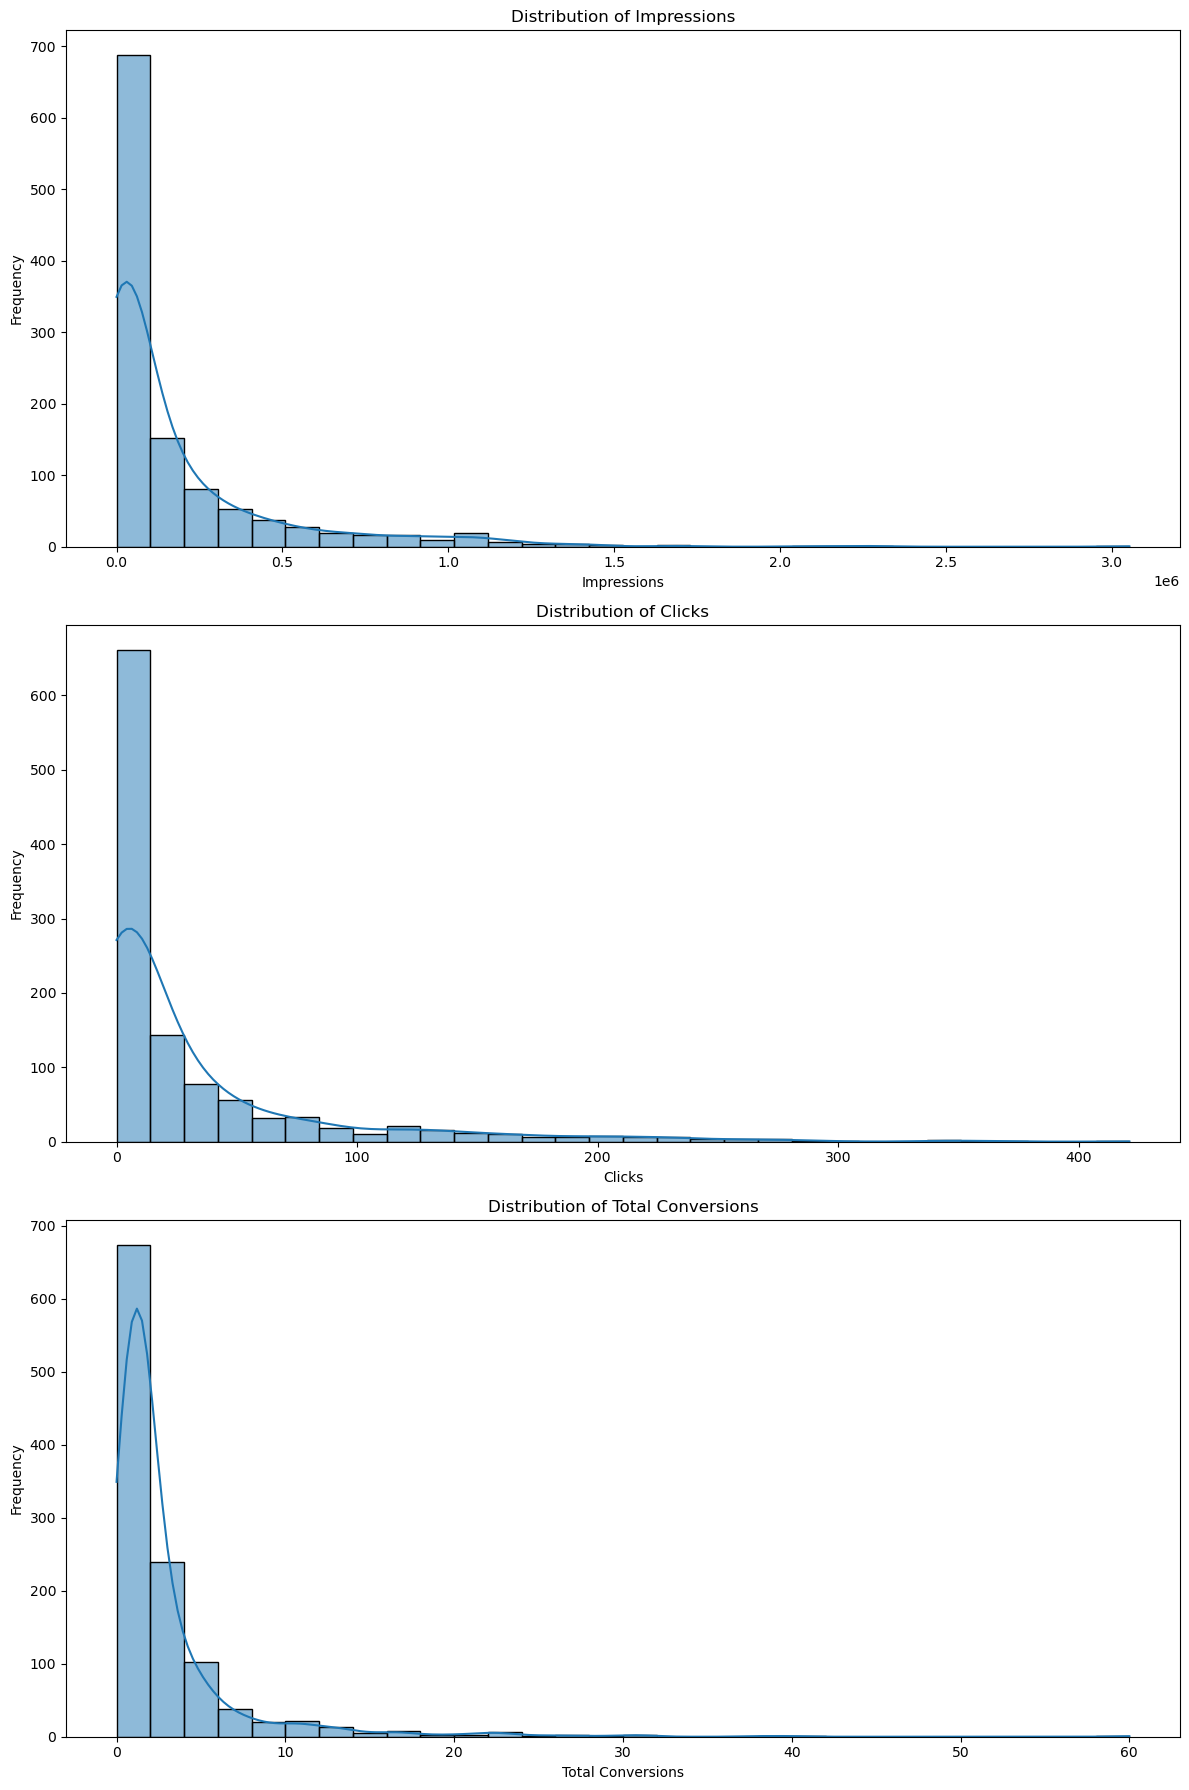

In [82]:
# Plot distributions of impressions, clicks, and conversion metrics
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.histplot(df['Impressions'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Impressions')
axs[0].set_xlabel('Impressions')
axs[0].set_ylabel('Frequency')

sns.histplot(df['Clicks'], bins=30, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Clicks')
axs[1].set_xlabel('Clicks')
axs[1].set_ylabel('Frequency')

sns.histplot(df['Total_Conversion'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Total Conversions')
axs[2].set_xlabel('Total Conversions')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
